In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
np.set_printoptions(suppress=True)
DISPLAY_MAX_ROWS = 20 # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [4]:
data = pd.read_csv("/Users/Elizabeth.Ke.Zhang/Desktop/NYU/9733 ML/Week 2/session2_data.csv", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)] # rename column names to be similar to R naming convention
data.V1 = data.V1.astype(str)
X = data.loc[:, "V2":] # independent variables data
y = data.V1 # dependednt variable data

In [5]:
print(data)

    V1     V2    V3    V4    V5   V6    V7    V8    V9   V10        V11   V12  \
0    1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.640000  1.04   
1    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.380000  1.05   
2    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.680000  1.03   
3    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.800000  0.86   
4    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.320000  1.04   
5    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.750000  1.05   
6    1  14.39  1.87  2.45  14.6   96  2.50  2.52  0.30  1.98   5.250000  1.02   
7    1  14.06  2.15  2.61  17.6  121  2.60  2.51  0.31  1.25   5.050000  1.06   
8    1  14.83  1.64  2.17  14.0   97  2.80  2.98  0.29  1.98   5.200000  1.08   
9    1  13.86  1.35  2.27  16.0   98  2.98  3.15  0.22  1.85   7.220000  1.01   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...        ...   ...   
168  3  13.58  2.58  2.69  2

In [6]:
data.loc[:,"V2":"V6"]

,V2,V3,V4,V5,V6
0,14.23,1.71,2.43,15.6,127
1,13.20,1.78,2.14,11.2,100
2,13.16,2.36,2.67,18.6,101
3,14.37,1.95,2.50,16.8,113
4,13.24,2.59,2.87,21.0,118
5,14.20,1.76,2.45,15.2,112
6,14.39,1.87,2.45,14.6,96
7,14.06,2.15,2.61,17.6,121
8,14.83,1.64,2.17,14.0,97
9,13.86,1.35,2.27,16.0,98


/Users/Elizabeth.Ke.Zhang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


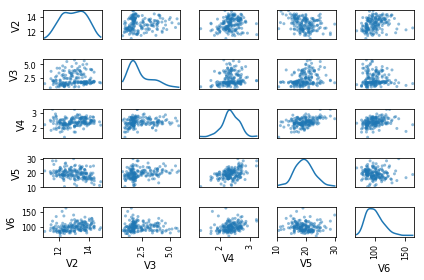

In [10]:
pd.tools.plotting.scatter_matrix(data.loc[:,"V2":"V6"], diagonal="kde")
plt.tight_layout()
plt.show()

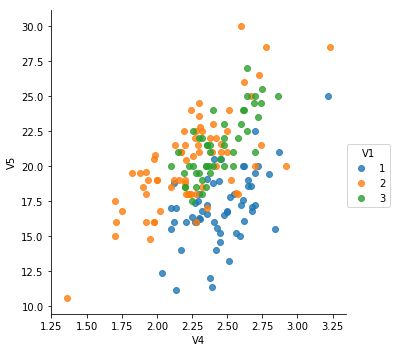

In [13]:
sns.lmplot("V4", "V5", data, hue="V1", fit_reg=False)
plt.show()

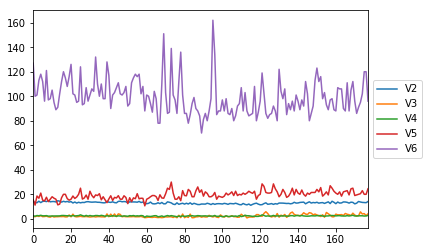

In [14]:
ax = data[["V2","V3","V4","V5","V6"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

In [15]:
X.apply(np.mean)

V2      13.000618
V3       2.336348
V4       2.366517
V5      19.494944
V6      99.741573
V7       2.295112
V8       2.029270
V9       0.361854
V10      1.590899
V11      5.058090
V12      0.957449
V13      2.611685
V14    746.893258
dtype: float64

In [16]:
X.apply(np.std)

V2       0.809543
V3       1.114004
V4       0.273572
V5       3.330170
V6      14.242308
V7       0.624091
V8       0.996049
V9       0.124103
V10      0.570749
V11      2.311765
V12      0.227929
V13      0.707993
V14    314.021657
dtype: float64

In [17]:
class2data = data[y=="2"]
class2data.loc[:, "V2":].apply(np.std)

V2       0.534162
V3       1.008391
V4       0.313238
V5       3.326097
V6      16.635097
V7       0.541507
V8       0.700713
V9       0.123085
V10      0.597813
V11      0.918393
V12      0.201503
V13      0.493064
V14    156.100173
dtype: float64

In [18]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std)) 
    print("\n## Sample sizes:") 
    display(pd.DataFrame(data_groupby.apply(len))) 

In [20]:
printMeanAndSdByGroup(X,y)

## Means:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833



## Standard deviations:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805



## Sample sizes:


,0
V1,
1,59
2,71
3,48


In [21]:
def calcWithinGroupsVariance(variable, groupvariable): 
    # find out how many values the group variable can take 
    levels = sorted(set(groupvariable)) 
    numlevels = len(levels) 
    # get the mean and standard deviation for each group: 
    numtotal = 0 
    denomtotal = 0 
    for leveli in levels: 
        levelidata = variable[groupvariable==leveli] 
        levelilength = len(levelidata) 
        # get the standard deviation for group i: 
        sdi = np.std(levelidata) 
        numi = (levelilength)*sdi**2 
        denomi = levelilength 
        numtotal = numtotal + numi 
        denomtotal = denomtotal + denomi 
    # calculate the within-groups variance 
    Vw = numtotal / (denomtotal - numlevels) 
    return Vw

In [22]:
calcWithinGroupsVariance(X.V2, y)

0.2620524691539065

In [23]:
def calcBetweenGroupsVariance(variable, groupvariable): 
    # find out how many values the group variable can take 
    levels = sorted(set((groupvariable))) 
    numlevels = len(levels) 
    # calculate the overall grand mean: 
    grandmean = np.mean(variable) 
    # get the mean and standard deviation for each group: 
    numtotal = 0 
    denomtotal = 0 
    for leveli in levels: 
        levelidata = variable[groupvariable==leveli] 
        levelilength = len(levelidata) 
        # get the mean and standard deviation for group i: 
        meani = np.mean(levelidata) 
        sdi = np.std(levelidata) 
        numi = levelilength * ((meani - grandmean)**2) 
        denomi = levelilength 
        numtotal = numtotal + numi 
        denomtotal = denomtotal + denomi 
    # calculate the between-groups variance 
    Vb = numtotal / (numlevels - 1) 
    return(Vb)

In [24]:
calcBetweenGroupsVariance(X.V2, y)

35.397424960269106

In [25]:
calcBetweenGroupsVariance(X.V2, y) / calcWithinGroupsVariance(X.V2, y)

135.07762424279917

In [26]:
def calcSeparations(variables, groupvariable):
    # calculate the separation for each variable 
    for variablename in variables: 
        variablei = variables[variablename] 
        Vw = calcWithinGroupsVariance(variablei, groupvariable) 
        Vb = calcBetweenGroupsVariance(variablei, groupvariable) 
        sep = Vb/Vw 
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

In [27]:
calcSeparations(X, y)

variable V2 Vw= 0.2620524691539065 Vb= 35.397424960269106 separation= 135.07762424279917
variable V3 Vw= 0.8875467967465813 Vb= 32.789018486921364 separation= 36.94342496318368
variable V4 Vw= 0.0660721013425184 Vb= 0.8796113572487572 separation= 13.312901199991257
variable V5 Vw= 8.006811181211566 Vb= 286.41674636308926 separation= 35.77163740730921
variable V6 Vw= 180.65777316441023 Vb= 2245.50102788939 separation= 12.429584338149898
variable V7 Vw= 0.1912704752242267 Vb= 17.92835729428464 separation= 93.73300962036717
variable V8 Vw= 0.274707514337437 Vb= 64.26119502356416 separation= 233.92587268154927
variable V9 Vw= 0.011911702213279677 Vb= 0.32847015746162356 separation= 27.575417146965858
variable V10 Vw= 0.2461729437955417 Vb= 7.451995507777756 separation= 30.27138317022764
variable V11 Vw= 2.2849230813335426 Vb= 275.7080008223043 separation= 120.66401844100315
variable V12 Vw= 0.024487646943241362 Vb= 2.4810099149382907 separation= 101.31679539030002
variable V13 Vw= 0.160778

In [30]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0 
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels: 
        levelidata1 = variable1[groupvariable==leveli] 
        levelidata2 = variable2[groupvariable==leveli] 
        mean1 = np.mean(levelidata1) 
        mean2 = np.mean(levelidata2) 
        levelilength = len(levelidata1) 
        # get the covariance for this group: 
        term1 = 0.0 
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2): 
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2) 
        Cov_groupi = term1 
        # covariance for this group 
        Covw += Cov_groupi 
    totallength = len(variable1) 
    Covw /= totallength - numlevels 
    return Covw

In [31]:
calcWithinGroupsCovariance(X.V8, X.V11, y)

0.28667830215140183

In [32]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take 
    levels = sorted(set(groupvariable)) 
    numlevels = len(levels) 
    # calculate the grand means 
    variable1mean = np.mean(variable1) 
    variable2mean = np.mean(variable2) 
    # calculate the between-groups covariance 
    Covb = 0.0 
    for leveli in levels: 
        levelidata1 = variable1[groupvariable==leveli] 
        levelidata2 = variable2[groupvariable==leveli] 
        mean1 = np.mean(levelidata1) 
        mean2 = np.mean(levelidata2) 
        levelilength = len(levelidata1) 
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength 
        Covb += term1 
    Covb /= numlevels - 1 
    return Covb

In [33]:
calcBetweenGroupsCovariance(X.V8, X.V11, y)

-60.4107748359163

In [34]:
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1]) 
print("cor:\t\t", corr[0])

p-value:	 0.210081985971
cor:		 0.0943969409104


In [35]:
corrmat = X.corr() 
corrmat

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V2,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
V3,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
V4,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
V5,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
V6,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
V7,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
V8,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
V9,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
V10,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
V11,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


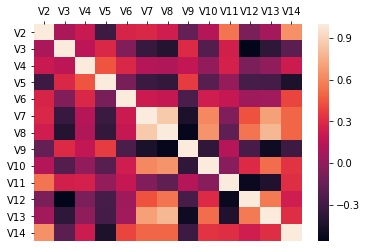

In [38]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()
plt.show()

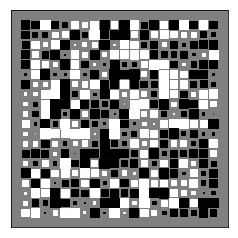

In [39]:
# adapted from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


if __name__ == '__main__':
    hinton(np.random.rand(20, 20) - 0.5)
    plt.show()

In [40]:
def mosthighlycorrelated(mydataframe, numtoreport): 
    # find the correlations 
    cormatrix = mydataframe.corr() 
    # set the correlations on the diagonal or lower triangle to zero, 
    # so they will not be reported as the highest ones: 
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T 
    # find the top n correlations 
    cormatrix = cormatrix.stack() 
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index() 
    # assign human-friendly names 
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"] 
    return cormatrix.head(numtoreport)

In [41]:
mosthighlycorrelated(X, 10)

,FirstVariable,SecondVariable,Correlation
0,V7,V8,0.864564
1,V8,V13,0.787194
2,V7,V13,0.699949
3,V8,V10,0.652692
4,V2,V14,0.643720
5,V7,V10,0.612413
6,V12,V13,0.565468
7,V3,V12,-0.561296
8,V2,V11,0.546364
9,V8,V12,0.543479


In [42]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)
standardisedX.apply(np.mean)

V2    -8.619821e-16
V3    -8.357859e-17
V4    -8.657245e-16
V5    -1.160121e-16
V6    -1.995907e-17
V7    -2.972030e-16
V8    -4.016762e-16
V9     4.079134e-16
V10   -1.699639e-16
V11   -1.247442e-18
V12    3.717376e-16
V13    2.919013e-16
V14   -7.484650e-18
dtype: float64

In [43]:
standardisedX.apply(np.std)

V2     1.0
V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
dtype: float64

In [50]:
pca = PCA().fit(standardisedX)

In [53]:
def pca_summary(pca, standardised_data, out=True): 
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)] 
    a = list(np.std(pca.transform(standardised_data), axis=0)) 
    b = list(pca.explained_variance_ratio_) 
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)] 
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out: 
        print("Importance of components:") 
        display(summary) 
    return summary

In [54]:
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.169297,0.361988,0.361988
PC2,1.580182,0.192075,0.554063
PC3,1.202527,0.111236,0.665300
PC4,0.958631,0.070690,0.735990
PC5,0.923704,0.065633,0.801623
PC6,0.801035,0.049358,0.850981
PC7,0.742313,0.042387,0.893368
PC8,0.590337,0.026807,0.920175
PC9,0.537476,0.022222,0.942397


In [55]:
summary.sdev

,Standard deviation
PC1,2.169297
PC2,1.580182
PC3,1.202527
PC4,0.958631
PC5,0.923704
PC6,0.801035
PC7,0.742313
PC8,0.590337
PC9,0.537476
PC10,0.500902


In [56]:
np.sum(summary.sdev**2)

Standard deviation    13.0
dtype: float64

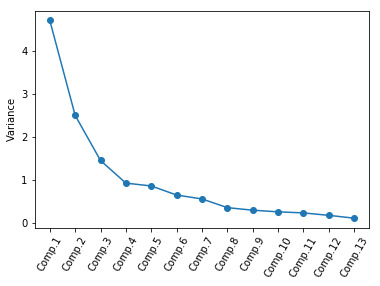

In [59]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

In [60]:
summary.sdev**2

,Standard deviation
PC1,4.705850
PC2,2.496974
PC3,1.446072
PC4,0.918974
PC5,0.853228
PC6,0.641657
PC7,0.551028
PC8,0.348497
PC9,0.288880
PC10,0.250902


In [61]:
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

In [62]:
np.sum(pca.components_[0]**2)

1.0000000000000004

In [63]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [64]:
calcpc(standardisedX, pca.components_[0])

array([ 3.31675081,  2.20946492,  2.51674015,  3.75706561,  1.00890849,
        3.05025392,  2.44908967,  2.05943687,  2.5108743 ,  2.75362819,
        3.47973668,  1.7547529 ,  2.11346234,  3.45815682,  4.31278391,
        2.3051882 ,  2.17195527,  1.89897118,  3.54198508,  2.0845222 ,
        3.12440254,  1.08657007,  2.53522408,  1.64498834,  1.76157587,
        0.9900791 ,  1.77527763,  1.23542396,  2.18840633,  2.25610898,
        2.50022003,  2.67741105,  1.62857912,  1.90269086,  1.41038853,
        1.90382623,  1.38486223,  1.12220741,  1.5021945 ,  2.52980109,
        2.58809543,  0.66848199,  3.07080699,  0.46220914,  2.10135193,
        1.13616618,  2.72660096,  2.82133927,  2.00985085,  2.7074913 ,
        3.21491747,  2.85895983,  3.50560436,  2.22479138,  2.14698782,
        2.46932948,  2.74151791,  2.17374092,  3.13938015, -0.92858197,
       -1.54248014, -1.83624976,  0.03060683,  2.05026161, -0.60968083,
        0.90022784,  2.24850719,  0.18338403, -0.81280503,  1.97

In [65]:
pca.transform(standardisedX)[:, 0]

array([ 3.31675081,  2.20946492,  2.51674015,  3.75706561,  1.00890849,
        3.05025392,  2.44908967,  2.05943687,  2.5108743 ,  2.75362819,
        3.47973668,  1.7547529 ,  2.11346234,  3.45815682,  4.31278391,
        2.3051882 ,  2.17195527,  1.89897118,  3.54198508,  2.0845222 ,
        3.12440254,  1.08657007,  2.53522408,  1.64498834,  1.76157587,
        0.9900791 ,  1.77527763,  1.23542396,  2.18840633,  2.25610898,
        2.50022003,  2.67741105,  1.62857912,  1.90269086,  1.41038853,
        1.90382623,  1.38486223,  1.12220741,  1.5021945 ,  2.52980109,
        2.58809543,  0.66848199,  3.07080699,  0.46220914,  2.10135193,
        1.13616618,  2.72660096,  2.82133927,  2.00985085,  2.7074913 ,
        3.21491747,  2.85895983,  3.50560436,  2.22479138,  2.14698782,
        2.46932948,  2.74151791,  2.17374092,  3.13938015, -0.92858197,
       -1.54248014, -1.83624976,  0.03060683,  2.05026161, -0.60968083,
        0.90022784,  2.24850719,  0.18338403, -0.81280503,  1.97

In [66]:
pca.components_[1]

array([-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
       -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
        0.27923515,  0.16449619, -0.36490283])

In [67]:
np.sum(pca.components_[1]**2)

1.0000000000000009

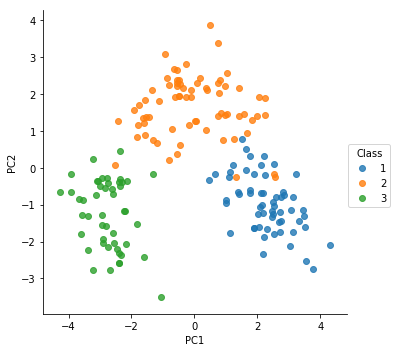

In [72]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)
plt.show()

In [73]:
printMeanAndSdByGroup(standardisedX, y);

## Means:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.919195,-0.292342,0.325604,-0.737997,0.463226,0.873362,0.956884,-0.578985,0.540383,0.203401,0.458847,0.771351,1.174501
2,-0.891720,-0.362362,-0.444958,0.223137,-0.364567,-0.058067,0.051780,0.014569,0.069002,-0.852799,0.433611,0.245294,-0.724110
3,0.189159,0.895331,0.257945,0.577065,-0.030127,-0.987617,-1.252761,0.690119,-0.766287,1.011418,-1.205382,-1.310950,-0.372578



## Standard deviations:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.565989,0.612825,0.823302,0.758115,0.730892,0.538506,0.395674,0.559639,0.715905,0.531210,0.506699,0.500058,0.699428
2,0.659832,0.905196,1.144991,0.998777,1.168006,0.867674,0.703493,0.991797,1.047418,0.397269,0.884060,0.696425,0.497100
3,0.648130,0.966347,0.668036,0.670991,0.756649,0.565996,0.291583,0.989818,0.708814,0.989176,0.496834,0.380317,0.362688



## Sample sizes:


,0
V1,
1,59
2,71
3,48


In [74]:
lda = LinearDiscriminantAnalysis().fit(X, y)

In [75]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1,LD2
V2,-0.403400,0.871793
V3,0.165255,0.305380
V4,-0.369075,2.345850
V5,0.154798,-0.146381
V6,-0.002163,-0.000463
V7,0.618052,-0.032213
V8,-1.661191,-0.491998
V9,-1.495818,-1.630954
V10,0.134093,-0.307088
V11,0.355056,0.253231


In [76]:
lda.scalings_[:, 0]

array([-0.40339978,  0.1652546 , -0.36907526,  0.15479789, -0.0021635 ,
        0.61805207, -1.66119123, -1.49581844,  0.13409263,  0.35505571,
       -0.81803607, -1.15755938, -0.00269121])

In [77]:
pretty_scalings_.LD1

V2    -0.403400
V3     0.165255
V4    -0.369075
V5     0.154798
V6    -0.002163
V7     0.618052
V8    -1.661191
V9    -1.495818
V10    0.134093
V11    0.355056
V12   -0.818036
V13   -1.157559
V14   -0.002691
Name: LD1, dtype: float64

In [78]:
def calclda(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the discriminant function
    ld = np.zeros(numsamples)
    # calculate the value of the discriminant function for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        ld[i] = valuei
    # standardise the discriminant function so that its mean value is 0:
    ld = scale(ld, with_std=False)
    return ld

In [79]:
calclda(X, lda.scalings_[:, 0])

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

In [80]:
# Try either, they produce the same result, use help() for more info
# lda.transform(X)[:, 0]
lda.fit_transform(X, y)[:, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

In [81]:
def groupStandardise(variables, groupvariable):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # find the variable names
    variablenames = variables.columns
    # calculate the group-standardised version of each variable
    variables_new = pd.DataFrame()
    for i in range(numvariables):
        variable_name = variablenames[i]
        variablei = variables[variable_name]
        variablei_Vw = calcWithinGroupsVariance(variablei, groupvariable)
        variablei_mean = np.mean(variablei)
        variablei_new = (variablei - variablei_mean)/(np.sqrt(variablei_Vw))
        variables_new[variable_name] = variablei_new
    return variables_new

In [82]:
groupstandardisedX = groupStandardise(X, y)

In [83]:
lda2 = LinearDiscriminantAnalysis().fit(groupstandardisedX, y)
pretty_scalings(lda2, groupstandardisedX)

,LD1,LD2
V2,-0.206505,0.446280
V3,0.155686,0.287697
V4,-0.094869,0.602989
V5,0.438021,-0.414204
V6,-0.029079,-0.006220
V7,0.270302,-0.014088
V8,-0.870673,-0.257869
V9,-0.163255,-0.178004
V10,0.066531,-0.152364
V11,0.536701,0.382783


In [84]:
lda.fit_transform(X, y)[:, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

In [85]:
lda2.fit_transform(groupstandardisedX, y)[:, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

In [86]:
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)}
    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values = rpredict(lda, standardisedX, y, True)

class
['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '3' '3' '3' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '3' '3' '3' '3' '3' '3' '3' '2' '2' '2' '3' '2' '3' '3' '2' '2'
 '2' '2' '3' '2' '3' '3' '3' '3' '2' '2' '3' '3' '3' '3' '2' '3']

posterior
                1         2         3
0    1.344367e-22  0.999236  0.000764
1    4.489007e-27  0.983392  0.016608
2    2.228888e-24  0.791616  0.208384
3    1.026755e-24  0.500161  0.499839
4    6.371860e-23  0.790657  0.209343
5    1.552082e-24  0.981986  0.0

In [87]:
calcSeparations(lda_values["x"], y)

variable LD1 Vw= 0.9999999999999997 Vb= 794.6522005662156 separation= 794.6522005662158
variable LD2 Vw= 0.9999999999999993 Vb= 361.2410414934542 separation= 361.2410414934544


In [88]:
def proportion_of_trace(lda):
    ret = pd.DataFrame([round(i, 4) for i in lda.explained_variance_ratio_ if round(i, 4) > 0], columns=["ExplainedVariance"])
    ret.index = ["LD"+str(i+1) for i in range(ret.shape[0])]
    ret = ret.transpose()
    print("Proportion of trace:")
    print(ret.to_string(index=False))
    return ret

proportion_of_trace(LinearDiscriminantAnalysis(solver="eigen").fit(X, y));

Proportion of trace:
LD1     LD2
0.6875  0.3125


In [89]:
def ldahist(data, g, sep=False):
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    ncol = len(set(g))
    binwidth = 0.5
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel("group"+str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

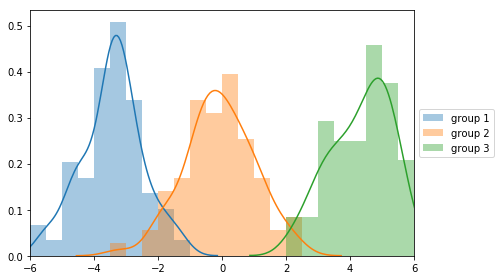

In [92]:
ldahist(lda_values["x"].LD1, y)
plt.show()

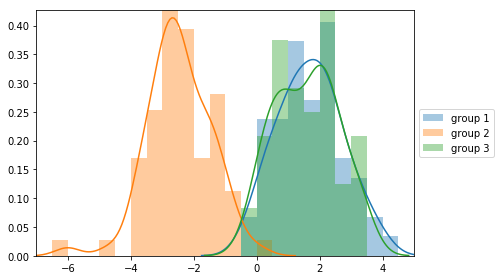

In [96]:
ldahist(lda_values["x"].LD2, y)
plt.show()

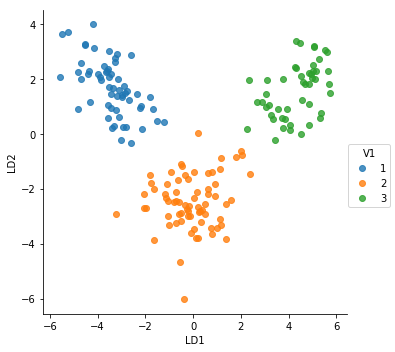

In [99]:
sns.lmplot("LD1", "LD2", lda_values["x"].join(y), hue="V1", fit_reg=False)
plt.show()

In [100]:
printMeanAndSdByGroup(lda_values["x"], y)

## Means:


,LD1,LD2
V1,,
1,-3.422489,1.691674
2,-0.079726,-2.472656
3,4.324737,1.578120



## Standard deviations:


,LD1,LD2
V1,,
1,0.931467,1.008978
2,1.076271,0.990268
3,0.930571,0.971586



## Sample sizes:


,0
V1,
1,59
2,71
3,48


In [101]:
def calcAllocationRuleAccuracy(ldavalue, groupvariable, cutoffpoints):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    confusion_matrix = []
    # calculate the number of true positives and false negatives for each group
    for i, leveli in enumerate(levels):
        levelidata = ldavalue[groupvariable==leveli]
        row = []
        # see how many of the samples from this group are classified in each group
        for j, levelj in enumerate(levels):
            if j == 0:
                cutoff1 = cutoffpoints[0]
                cutoff2 = "NA"
                results = (levelidata <= cutoff1).value_counts()
            elif j == numlevels-1:
                cutoff1 = cutoffpoints[numlevels-2]
                cutoff2 = "NA"
                results = (levelidata > cutoff1).value_counts()
            else:
                cutoff1 = cutoffpoints[j-1]
                cutoff2 = cutoffpoints[j]
                results = ((levelidata > cutoff1) & (levelidata <= cutoff2)).value_counts()
            try:
                trues = results[True]
            except KeyError:
                trues = 0
            print("Number of samples of group", leveli, "classified as group", levelj, ":", trues, "(cutoffs:", cutoff1, ",", cutoff2, ")")
            row.append(trues)
        confusion_matrix.append(row)
    return confusion_matrix

In [102]:
confusion_matrix = calcAllocationRuleAccuracy(lda_values["x"].iloc[:, 0], y, [-1.751107, 2.122505])

Number of samples of group 1 classified as group 1 : 56 (cutoffs: -1.751107 , NA )
Number of samples of group 1 classified as group 2 : 3 (cutoffs: -1.751107 , 2.122505 )
Number of samples of group 1 classified as group 3 : 0 (cutoffs: 2.122505 , NA )
Number of samples of group 2 classified as group 1 : 5 (cutoffs: -1.751107 , NA )
Number of samples of group 2 classified as group 2 : 65 (cutoffs: -1.751107 , 2.122505 )
Number of samples of group 2 classified as group 3 : 1 (cutoffs: 2.122505 , NA )
Number of samples of group 3 classified as group 1 : 0 (cutoffs: -1.751107 , NA )
Number of samples of group 3 classified as group 2 : 0 (cutoffs: -1.751107 , 2.122505 )
Number of samples of group 3 classified as group 3 : 48 (cutoffs: 2.122505 , NA )


In [103]:
def webprint_confusion_matrix(confusion_matrix, classes_names):
    display(pd.DataFrame(confusion_matrix, index=["Is group "+i for i in classes_names], columns=["Allocated to group "+i for i in classes_names]))

webprint_confusion_matrix(confusion_matrix, lda.classes_)

,Allocated to group 1,Allocated to group 2,Allocated to group 3
Is group 1,56,3,0
Is group 2,5,65,1
Is group 3,0,0,48


In [104]:
import sklearn.metrics as metrics

def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]
    
y_pred = lda_values["x"].iloc[:, 0].apply(lda_classify, args=(lda.classes_, [-1.751107, 2.122505],)).values
y_true = y

             precision    recall  f1-score   support

          1       0.92      0.95      0.93        59
          2       0.96      0.92      0.94        71
          3       0.98      1.00      0.99        48

avg / total       0.95      0.95      0.95       178



,Allocated to group 1,Allocated to group 2,Allocated to group 3
Is group 1,56,3,0
Is group 2,5,65,1
Is group 3,0,0,48


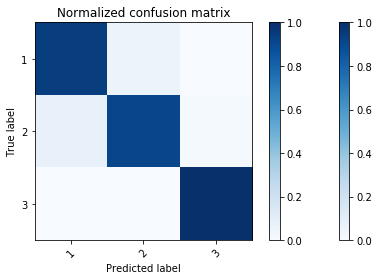

In [106]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(metrics.classification_report(y_true, y_pred))
cm = metrics.confusion_matrix(y_true, y_pred)
webprint_confusion_matrix(cm, lda.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, lda.classes_, title='Normalized confusion matrix')
plt.show()